In [1]:
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

sc.set_figure_params(dpi_save=300,color_map = 'viridis_r')
sc.settings.verbosity = 1
sc.logging.print_header()

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/data/person/lab/fengcz/conda/envs/squidpy/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-11-21 16:43:17.375506: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-21 16:43:17.505886: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-21 16:43:17.549590: E e

scanpy==1.9.3 anndata==0.9.2 umap==0.5.3 numpy==1.25.2 scipy==1.11.4 pandas==1.3.5 scikit-learn==1.2.1 statsmodels==0.14.0 python-igraph==0.10.2 pynndescent==0.5.7


# Read results from SPATA2 infercnv

In [2]:
def read_spata_cnv(sample):
    cnv = pd.read_csv(f'./window100/{sample}/cnv.csv',index_col=0)
    metadata = pd.read_csv(f'./window100/{sample}/metadata.csv',index_col=0)
    coord = pd.read_csv(f'./window100/{sample}/coord.csv',index_col=0)

    adata = an.AnnData(X=cnv.T,obs=metadata,obsm={'spatial':coord})

    return(adata)

In [3]:
adata_cnv = read_spata_cnv('P6_YF_1')
adata_cnv.obsm['spatial'] = adata_cnv.obsm['spatial'].astype(float)
adata_cnv

/tmp/ipykernel_170831/3271297207.py:6: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = an.AnnData(X=cnv.T,obs=metadata,obsm={'spatial':coord})


AnnData object with n_obs × n_vars = 87842 × 3522
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'Patient', 'Sample', 'Site', 'X_center', 'Y_center', 'n_counts', 'X_indices', 'X_scvi_batch', 'X_scvi_labels', 'CD4..T', 'CD8..T', 'DC', 'Endothelial.cells', 'Epithelial.cells', 'Fibroblasts', 'M1.like', 'NK', 'Pericytes', 'Plasma.cells', 'Macros.MRC1', 'Macros.SPP1', 'Treg', 'myCAF.MMP11.', 'myCAF.MMP11..1', 'Cell_type_refined', 'Chr1', 'Chr10', 'Chr11', 'Chr12', 'Chr13', 'Chr14', 'Chr15', 'Chr16', 'Chr17', 'Chr18', 'Chr19', 'Chr2', 'Chr20', 'Chr21', 'Chr22', 'Chr3', 'Chr4', 'Chr5', 'Chr6', 'Chr7', 'Chr8', 'Chr9', 'ChrX'
    obsm: 'spatial'

In [4]:
adata_cnv.write_h5ad('./window100/P6_YF_1/cnv.h5ad')

In [2]:
adata_cnv = sc.read('./window100/P6_YF_1/cnv.h5ad')
adata_cnv

AnnData object with n_obs × n_vars = 87842 × 3522
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'Patient', 'Sample', 'Site', 'X_center', 'Y_center', 'n_counts', 'X_indices', 'X_scvi_batch', 'X_scvi_labels', 'CD4..T', 'CD8..T', 'DC', 'Endothelial.cells', 'Epithelial.cells', 'Fibroblasts', 'M1.like', 'NK', 'Pericytes', 'Plasma.cells', 'Macros.MRC1', 'Macros.SPP1', 'Treg', 'myCAF.MMP11.', 'myCAF.MMP11..1', 'Cell_type_refined', 'Chr1', 'Chr10', 'Chr11', 'Chr12', 'Chr13', 'Chr14', 'Chr15', 'Chr16', 'Chr17', 'Chr18', 'Chr19', 'Chr2', 'Chr20', 'Chr21', 'Chr22', 'Chr3', 'Chr4', 'Chr5', 'Chr6', 'Chr7', 'Chr8', 'Chr9', 'ChrX'
    obsm: 'spatial'

# Perform principal component analysis

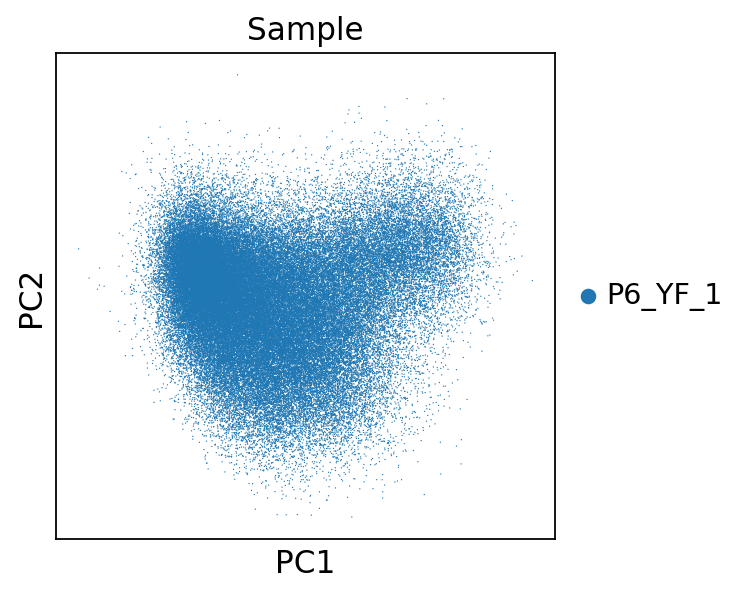

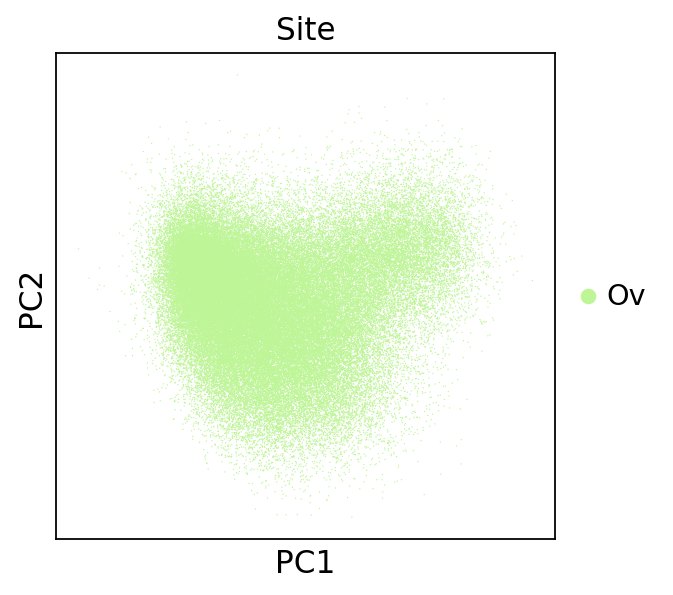

In [3]:
sc.tl.pca(adata_cnv,n_comps=30)
sc.pl.pca(adata_cnv,color='Sample')
sc.pl.pca(adata_cnv,color='Site',palette=['#BEF597','#FFDDF1','#FBBF6F','#CD5C5C','#CCDAF7'],save='_OV006_Ov_R_1_site.pdf')

# Calculate CNV clusters using leiden algorithms on PCA coordinates of CNV matrix

In [5]:
sc.pp.neighbors(adata_cnv)

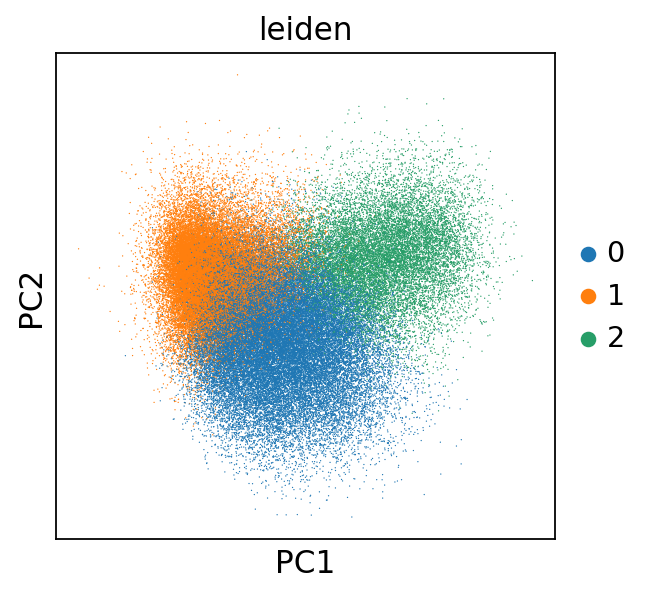

In [6]:
sc.tl.leiden(adata_cnv,resolution=0.3)
sc.pl.pca(adata_cnv,color='leiden')

# Manually check CNV features for each clone, comparing with WGS and scRNA-seq clones

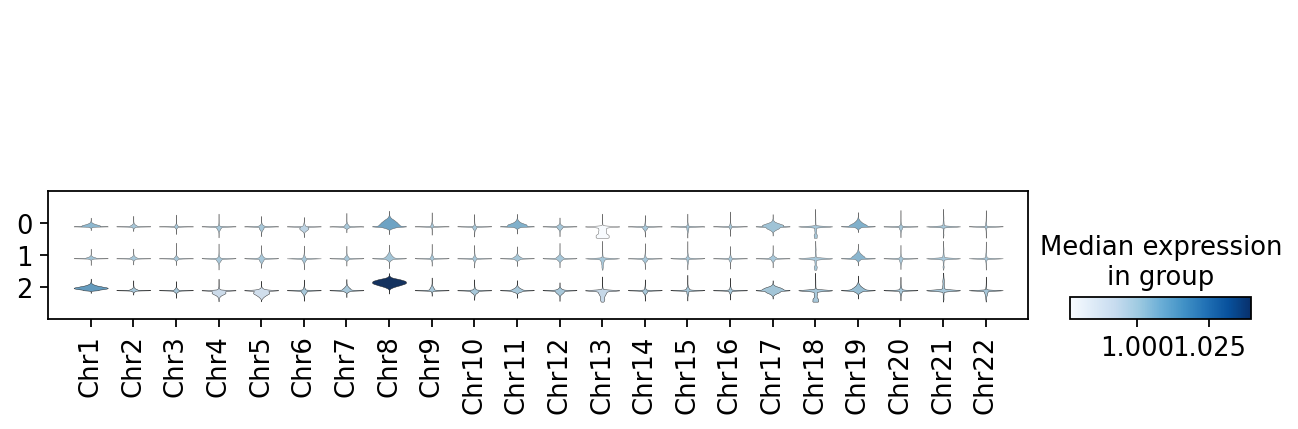

In [7]:
sc.pl.stacked_violin(adata_cnv,['Chr'+str(i) for i in range(1,23)],groupby='leiden')

# In WGS and scRNA-seq, clone1 represents normal cells without CNV. clone2 with some aberrant copy numbers and clone3 with higher Chr8 amplification as well as Chr6 LOH/Deletion
# According to these features, we manually assign spatial clones

In [8]:
adata_cnv.obs['Spatial_clone'] = adata_cnv.obs.leiden.map(
    {
        '0':'clone_2',
        '1':'clone_1',
        '2':'clone_3'
    }

).astype('category')
adata_cnv.obs['Spatial_clone'] = adata_cnv.obs['Spatial_clone'].cat.set_categories(['clone_1','clone_2','clone_3'])
adata_cnv.obs['Spatial_clone']

P6_YF_1_0_2550         clone_2
P6_YF_1_0_3250         clone_2
P6_YF_1_0_3300         clone_2
P6_YF_1_0_3450         clone_2
P6_YF_1_0_3650         clone_2
                        ...   
P6_YF_1_5000_12150     clone_1
P6_YF_1_13300_16300    clone_1
P6_YF_1_13950_14900    clone_1
P6_YF_1_10200_11500    clone_1
P6_YF_1_13500_15250    clone_1
Name: Spatial_clone, Length: 87842, dtype: category
Categories (3, object): ['clone_1', 'clone_2', 'clone_3']

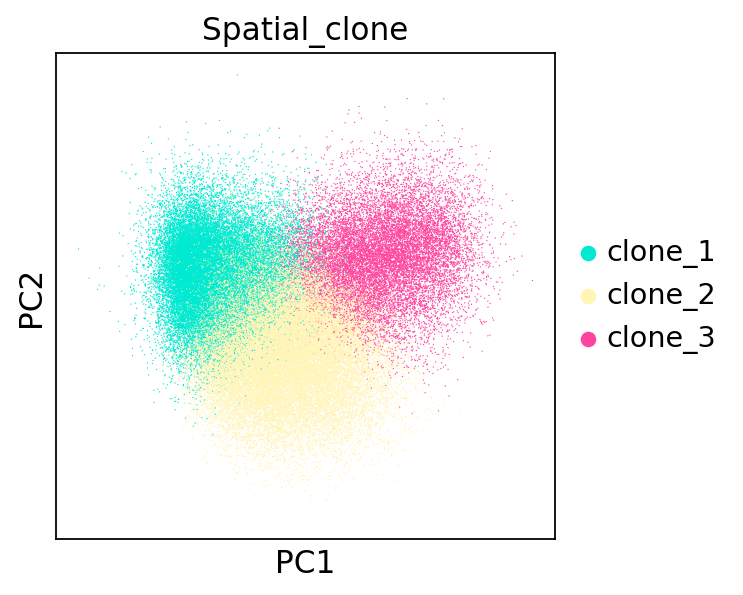

In [9]:
sc.pl.pca(adata_cnv,color='Spatial_clone',palette=['#00EAD3','#FFF5B7','#FF449F','#005F99','#184D47'],save='_OV006_Ov_R_1_clone_pca.pdf')

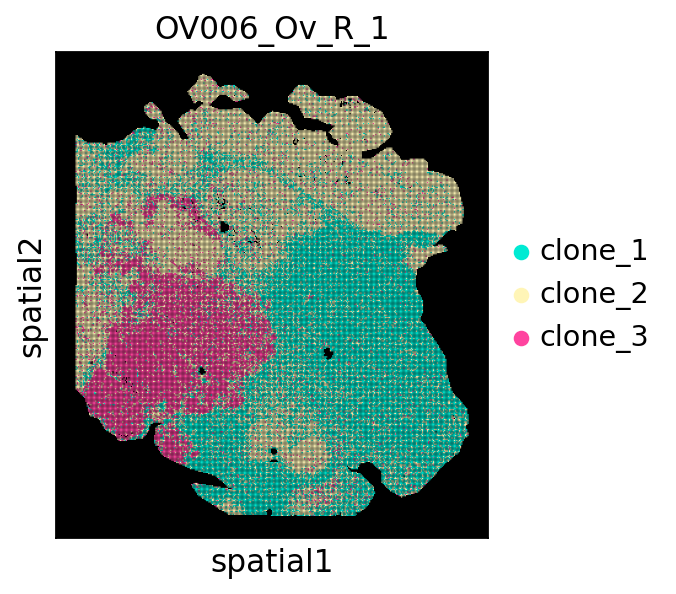

In [14]:
adata_cnv.obsm['spatial'] = adata_cnv.obsm['spatial'].values

with mpl.rc_context({'axes.facecolor':'black'}):
    sc.pl.spatial(adata_cnv,
         color='Spatial_clone',
         title='OV006_Ov_R_1',palette=['#00EAD3','#FFF5B7','#FF449F','#005F99','#184D47'],save='_OV006_Ov_R_1_clone.pdf',
         spot_size=50)

In [15]:
adata_cnv.write_h5ad('./window100/P6_YF_1/clone_assigned.h5ad')

In [2]:
adata_cnv = sc.read('./window100/P6_YF_1/clone_assigned.h5ad')
adata_cnv

AnnData object with n_obs × n_vars = 87842 × 3522
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'Patient', 'Sample', 'Site', 'X_center', 'Y_center', 'n_counts', 'X_indices', 'X_scvi_batch', 'X_scvi_labels', 'CD4..T', 'CD8..T', 'DC', 'Endothelial.cells', 'Epithelial.cells', 'Fibroblasts', 'M1.like', 'NK', 'Pericytes', 'Plasma.cells', 'Macros.MRC1', 'Macros.SPP1', 'Treg', 'myCAF.MMP11.', 'myCAF.MMP11..1', 'Cell_type_refined', 'Chr1', 'Chr10', 'Chr11', 'Chr12', 'Chr13', 'Chr14', 'Chr15', 'Chr16', 'Chr17', 'Chr18', 'Chr19', 'Chr2', 'Chr20', 'Chr21', 'Chr22', 'Chr3', 'Chr4', 'Chr5', 'Chr6', 'Chr7', 'Chr8', 'Chr9', 'ChrX', 'leiden', 'Spatial_clone'
    uns: 'Sample_colors', 'Site_colors', 'Spatial_clone_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca'
    obsm: 'X_pca', '

In [3]:
adata_cnv.obs.to_csv('./window100/P6_YF_1/spatial_clone.csv')